In [26]:
using CSV, DataFrames,WebIO, IJulia, Plots, Interact, Dates


In [27]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv";

In [28]:
download(url,"covid_data.csv")

"covid_data.csv"

In [29]:
readdir()

29-element Array{String,1}:
 ".ipynb_checkpoints"
 "JupyterUCM-master"
 "JupyterUCM-master.zip"
 "ManualJupyterIngles.pdf"
 "Markdown.html"
 "Markdown.ipynb"
 "Markdown.slides.html"
 "SHO.ipynb"
 "SIR.ipynb"
 "Why Jupyter.aux"
 "Why Jupyter.html"
 "Why Jupyter.ipynb"
 "Why Jupyter.log"
 ⋮
 "covid_data.csv"
 "covid_video.ipynb"
 "first_note_book.ipynb"
 "jmc_logo.png"
 "jupyter.png"
 "kuramoto-3s3-syn.ipynb"
 "open-source-software.png"
 "pl.jpg"
 "sho.gif"
 "sir.png"
 "tmp.gif"
 "untitled.txt"

In [30]:
data=CSV.read("covid_data.csv")

,Province/State,Country/Region,Lat,Long,1/22/20
,String?,String,Float64,Float64,Int64
1,missing,Afghanistan,33.9391,67.71,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [31]:
?rename; # rename => create new file rename! replace the current file

In [32]:
rename(data,1=> "province", 2=> "country")

,province,country,Lat,Long,1/22/20
,String?,String,Float64,Float64,Int64
1,missing,Afghanistan,33.9391,67.71,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0



WebIO.install_jupyter_nbextension()
WebIO.install_jupyter_labextension()

In [33]:
countries=collect(data[:,2]);

In [34]:
unique_countries=unique(countries)

188-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Austria"
 "Azerbaijan"
 "Bahamas"
 "Bahrain"
 ⋮
 "MS Zaandam"
 "Botswana"
 "Burundi"
 "Sierra Leone"
 "Malawi"
 "South Sudan"
 "Western Sahara"
 "Sao Tome and Principe"
 "Yemen"
 "Comoros"
 "Tajikistan"
 "Lesotho"

In [35]:
I_countries=[startswith(country, "I") for country in countries];


In [36]:
data[I_countries, :]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20
,String?,String,Float64,Float64,Int64,Int64,Int64,Int64
1,missing,Iceland,64.9631,-19.0208,0,0,0,0
2,missing,India,20.5937,78.9629,0,0,0,0
3,missing,Indonesia,-0.7893,113.921,0,0,0,0
4,missing,Iran,32.4279,53.688,0,0,0,0
5,missing,Iraq,33.2232,43.6793,0,0,0,0
6,missing,Ireland,53.1424,-7.6921,0,0,0,0
7,missing,Israel,31.0461,34.8516,0,0,0,0
8,missing,Italy,41.8719,12.5674,0,0,0,0


In [37]:
countries .== "India"

266-element BitArray{1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [38]:
India_index=findfirst(countries.=="India")

132

In [39]:
India_data_row=data[India_index,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20
,String?,String,Float64,Float64,Int64,Int64,Int64,Int64
132,missing,India,20.5937,78.9629,0,0,0,0


In [40]:
India_data=convert(Vector,India_data_row[5:end])

177-element Array{Int64,1}:
       0
       0
       0
       0
       0
       0
       0
       0
       1
       1
       1
       2
       3
       ⋮
  697413
  719664
  742417
  767296
  793802
  820916
  849522
  878254
  906752
  936181
  968857
 1003832

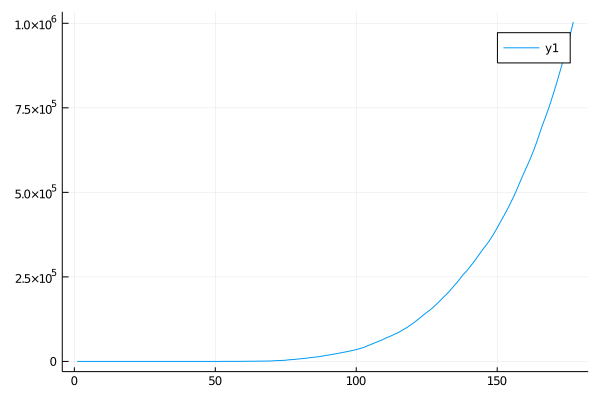

In [41]:
plot(India_data)

In [42]:
date_string=String.(names(data))[5:end];

In [43]:
date_string[1]

"1/22/20"

In [44]:
format=Dates.DateFormat("m/d/Y")

dateformat"m/d/Y"

In [45]:
parse(Date, date_string[1],format)

0020-01-22

In [46]:
parse(Date, date_string[1],format)+Year(2000)

2020-01-22

In [47]:
dates=parse.(Date, date_string,format).+Year(2000);

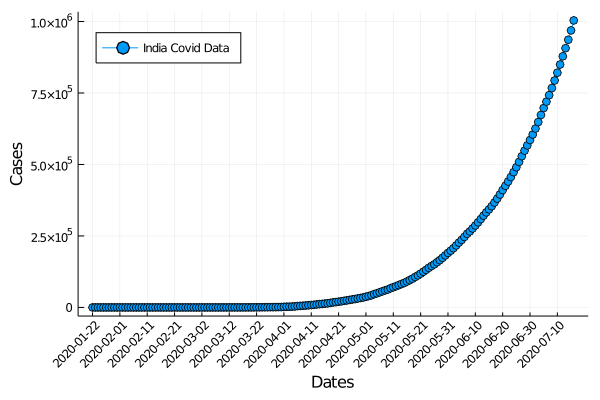

In [48]:
plot(dates,India_data, xticks=dates[1:10:end],xrotation=45,leg=:topleft,m=:o,
    label=:"India Covid Data")

xlabel!("Dates")
ylabel!("Cases")
